In [82]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn import metrics
from sklearn.metrics import r2_score

In [83]:
dataset = r'..\data\cleaned_fish_shellfish_dataset.csv'
df = pd.read_csv(dataset, header=0)

### <span style="color:#1E824C">Agenda</span>
In this sprint, I investigate how Fiskerikajen can predict seafood prices and profits using machine learning. I use supervised learning (linear regression) to model both price_kr and profit_kr based on features like season and weight. The models are evaluated with MAE, MSE, RMSE, and R² to assess their accuracy and business value.

### <span style="color:#1E824C">Train and Model</span>
In this section, I train machine learning models to investigate the relationships between key product features and the price and profit of seafood. Based on the research questions, I use supervised learning (linear regression) to predict both price_kr and profit_kr using relevant features such as season, weight, and freight charge.

The goal is to test whether these variables can explain pricing and profitability trends, and to evaluate the accuracy of the predictions using standard regression metrics.

#### <span style="color:#1E824C"> Choose the Features and Targets</span>

In [84]:

Y_price = df['price_kr'].values.reshape(-1, 1)
X_price = df[['weight_g', 'freight_charge_kr',
              'season_availability_Summer','season_availability_Spring',
              'season_availability_Autumn', 'season_availability_Winter', 'year']]

In [85]:
Y_profit = df['profit_kr']
X_profit = df[['weight_g', 'freight_charge_kr',
              'season_availability_Summer','season_availability_Spring',
              'season_availability_Autumn', 'season_availability_Winter', 'year']]

#### <span style="color:#1E824C">  Split the data </span>

In [86]:
# Price 
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X_price, Y_price, random_state=123, test_size=0.15) 

In [87]:
print(X_train_price.shape)
print(y_train_price.shape)
print(X_test_price.shape)
print(y_test_price.shape)

(1899, 7)
(1899, 1)
(336, 7)
(336, 1)


In [88]:
# Profit
X_train_profit, X_test_profit, y_train_profit, y_test_profit = train_test_split(X_profit, Y_profit, test_size=0.15, random_state=123)

In [89]:
print(X_train_profit.shape)
print(X_test_profit.shape)
print(y_train_profit.shape)
print(y_test_profit.shape)

(1899, 7)
(336, 7)
(1899,)
(336,)


#### <span style="color:#1E824C">  Train the ML models </span>

##### <span style="color:#1E824C">  Price </span>

In [90]:
price_model = LinearRegression()

In [91]:
price_model.fit(X_train_price, y_train_price)
price_model

LinearRegression()

In [92]:
a = price_model.coef_
b = price_model.intercept_

##### <span style="color:#1E824C">  Profit </span>

In [93]:
profit_model = LinearRegression()
profit_model.fit(X_train_profit, y_train_profit)

LinearRegression()

#### <span style="color:#1E824C">  Test the test models  </span>

In [94]:
a2 = profit_model.coef_
b2 = profit_model.intercept_

In [95]:
y_pred_price = price_model.predict(X_test_price)
print("Predicted prices:", y_pred_price[:5])

Predicted prices: [[ 81.43246018]
 [ 97.79405522]
 [ 83.50351556]
 [104.31144813]
 [121.05172405]]


In [96]:
print("Sample profit values before training:", y_train_profit[:5])

Sample profit values before training: 999      89.997622
711      79.073161
417      70.848619
2217    111.457970
641      85.316495
Name: profit_kr, dtype: float64


In [97]:
y_pred_profit = profit_model.predict(X_test_profit)
print("Predicted profits:", y_pred_profit[:5])

Predicted profits: [ 72.00586546  87.6646223   75.80479587  93.5104233  107.02113304]


In this step, I used my trained linear regression models to predict both price_kr and profit_kr based on the product features weight, freight charge, and season.

1. The predicted prices appear realistic and fall within an expected range (e.g., 81 to 121 kr), which suggests the model has learned the pricing patterns from the training data.

2. The predicted profits, however, are very low — some are even negative or close to zero. This suggests that the profit model may not be performing well or could be affected by improper scaling, unscaled target values, or weak feature relationships.

#### <span style="color:#1E824C">  Visualise the Linear Regressions  </span>

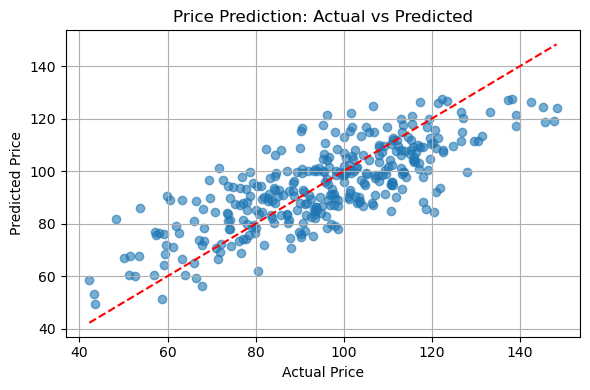

In [98]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test_price, y_pred_price, alpha=0.6)
plt.plot([y_test_price.min(), y_test_price.max()],
         [y_test_price.min(), y_test_price.max()],
         color='red', linestyle='--')  # perfect prediction line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Price Prediction: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

##### <span style="color:#1E824C">  Price Model  </span>
This scatter plot visualizes the performance of the linear regression model in predicting seafood prices (price_kr). Each point represents a product from the test dataset, comparing the actual price (x-axis) with the predicted price (y-axis).

The red line represents a good prediction line, where predicted and actual prices are equal. Most data points lie close to this line, indicating that the model is able to predict prices with reasonable accuracy. Some deviation from the line is expected, and a few outliers suggest occasional over- or underestimation. Overall, the plot confirms that the model has successfully learned the pricing patterns in the data

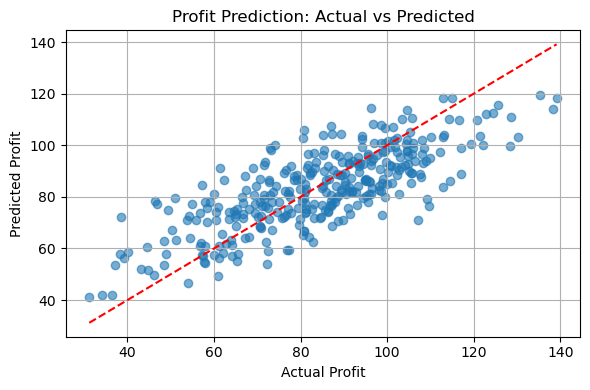

In [99]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test_profit, y_pred_profit, alpha=0.6)
plt.plot([y_test_profit.min(), y_test_profit.max()],
         [y_test_profit.min(), y_test_profit.max()],
         color='red', linestyle='--')  # perfect prediction line
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Profit Prediction: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

##### <span style="color:#1E824C">  Profit Model  </span>
This scatter plot illustrates the linear regression model in predicting seafood profits (profit_kr). Each point compares the actual profit (x-axis) to the predicted profit (y-axis) for individual products in the test set.

The red line represents perfect prediction — where the predicted profit equals the actual profit. Most points are clustered around this line, indicating that the model has learned the profit patterns well. While there is some spread, at lower profit levels, the overall alignment suggests the model can make meaningful and usable predictions of profitability for Fiskerikajen’s seafood products.

#### <span style="color:#1E824C">  Evaluate both models </span>

In [111]:
# MAE
mae_price = metrics.mean_absolute_error(y_test_price, y_pred_price)
print(mae_price)

10.376771124481975


In [112]:
# MAE
mae_profit = metrics.mean_absolute_error(y_test_profit, y_pred_profit)
print(mae_profit)

10.376771124481976


##### <span style="color:#1E824C">  MAE (Mean Absolute Error)  </span>
To assess the accuracy of both linear regression models, I calculated the MAE — a metric that measures the average absolute difference between actual and predicted values. On average, the model’s predicted price and profit deviate by approximately 10.38 kr from the actual values. This level of error is relatively low and acceptable in many real-world pricing scenarios, especially when dealing with seafood market variations.

In [102]:
# MSE
mse_price = metrics.mean_squared_error(y_test_price, y_pred_price)
print(mse_price)

162.86929814524015


In [103]:
#MSE 
mse_profit = metrics.mean_squared_error(y_test_profit, y_pred_profit)
print(mse_profit)

162.8692981452402


##### <span style="color:#1E824C">  MSE (Mean Squared Error)  </span>
To further assess the accuracy of the linear regression models, I calculated the MSE — a metric that penalizes larger prediction errors by squaring the differences between actual and predicted values. The results shows, that the average squared error for both price and profit predictions is about 163 kr². This is a relatively low MSE, suggesting that the model is not making large, frequent mistakes and is performing reliably for both targets.


In [104]:
# RMSE
rmse_price = np.sqrt(metrics.mean_squared_error(y_test_price, y_pred_price))
print(rmse_price)

12.762025628607715


In [105]:
# RMSE
rmse_profit = np.sqrt(metrics.mean_squared_error(y_test_profit, y_pred_profit))
print(rmse_profit)

12.762025628607718


##### <span style="color:#1E824C">  RMSE (Root Mean Squared Error) </span>
RMSE is another key metric i am using to evaluate the performance of the regression models. RMSE is the square root of the MSE and provides an error metric in the same unit as the target variable (kr), making it easier to interpret.

The results shows that, on average, the model’s predictions for both price and profit deviate from the actual values by about 12.76 kr. The low RMSE values here, suggest that both models offer a reasonably good fit to the data and are reliable for practical use.


#### <span style="color:#1E824C"> Calculate R² score (Coefficient of determination) </span>


##### <span style="color:#1E824C"> Price </span>

In [106]:
eV = round(sm.explained_variance_score(y_test_price, y_pred_price), 2)
print('Explained variance score ',eV )

Explained variance score  0.61


In [107]:
r2_score(y_test_price, y_pred_price)

0.6047767825714618


##### <span style="color:#1E824C"> Profit </span>

In [108]:
eV2 = round(sm.explained_variance_score(y_test_profit, y_pred_profit), 2)
print('Explained variance score ',eV2 )

Explained variance score  0.6


In [109]:
r2_score(y_test_profit, y_pred_profit)

0.5942684807527658

The R² score  measures how well the regression model explains the variability of the target variable. A score of 1.0 means perfect prediction, while 0 indicates that the model does no better than predicting the mean.

1. The price model explains approximately 60% of the variation in seafood prices based on the input features (weight, year, freight charge, and seasons).

2. The profit model explains around 59% of the variation in seafood profits.

These values indicate that the models are performing reasonably well, capturing more than half of the variance in the data. 

### <span style="color:#1E824C">Conclution of Train, Test, and Evaluate the Models</span>

<span style="color:#1E824C">Model performance</span>: 
R² score for both models is around 0.60, meaning they explain about 60% of the variation in the target values. The models show a clear relationship between product features and both price and profit.

<span style="color:#1E824C"> Error metrics </span>:
* MAE ≈ 10.4 kr → On average, predictions are off by about 10 kroner. 
* MSE ≈ 163 kr², RMSE ≈ 12.76 kr → Errors are low and consistent, no major outliers.

<span style="color:#1E824C"> Visual results </span>:
The scatter plots show that most predictions lie close to the ideal line, confirming good model fit and useful predictions.
The models can reliably predict seafood prices and profits using a few core variables. The results are accurate enough to support real-world business decisions at Fiskerikajen, especially for pricing strategy and product planning. 